In [6]:
import pandas as pd
import numpy as np

# Load the data - ensure the file name matches exactly
df = pd.read_csv("/world_health_data.csv")

# Display the total count of missing (NaN) values per column
print("--- MISSING VALUES COUNT ---")
print(df.isnull().sum())
print("\n--- DATA TYPES ---")
print(df.dtypes)

--- MISSING VALUES COUNT ---
country                     0
country_code                0
year                        0
health_exp               1483
life_expect               460
maternal_mortality       1757
infant_mortality          794
neonatal_mortality        794
under_5_mortality         794
prev_hiv                 2380
inci_tuberc              1221
prev_undernourishment    1845
dtype: int64

--- DATA TYPES ---
country                   object
country_code              object
year                       int64
health_exp               float64
life_expect              float64
maternal_mortality       float64
infant_mortality         float64
neonatal_mortality       float64
under_5_mortality        float64
prev_hiv                 float64
inci_tuberc              float64
prev_undernourishment    float64
dtype: object


(6650, 12)

In [7]:
df.shape

(6650, 12)

In [8]:
df.head()

,country,country_code,year,health_exp,life_expect,maternal_mortality,infant_mortality,neonatal_mortality,under_5_mortality,prev_hiv,inci_tuberc,prev_undernourishment
0,Aruba,ABW,1999,NaN,73.561000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,1999,NaN,51.258874,NaN,88.285642,38.433841,142.506373,6.684793,NaN,NaN
2,Afghanistan,AFG,1999,NaN,54.846000,NaN,94.600000,64.000000,135.800000,0.100000,NaN,NaN
3,Africa Western and Central,AFW,1999,NaN,49.726429,NaN,101.541373,44.733554,173.943151,NaN,NaN,NaN
4,Angola,AGO,1999,NaN,45.386000,NaN,123.500000,51.000000,208.000000,1.300000,NaN,NaN


In [11]:
df_africa.head(8)

,country,country_code,year,health_exp,life_expect,maternal_mortality,infant_mortality,neonatal_mortality,under_5_mortality,prev_hiv,inci_tuberc,prev_undernourishment
2942,Burundi,BDI,2010,11.281967,57.081,608.0,59.2,28.4,90.7,1.6,144.0,NaN
2998,Ethiopia,ETH,2010,5.466372,59.730,635.0,54.6,38.7,82.5,1.4,268.0,21.9
3047,Kenya,KEN,2010,5.388498,60.649,476.0,36.9,21.9,53.3,5.6,531.0,21.7
3129,Rwanda,RWA,2010,8.086969,62.540,386.0,44.1,23.4,63.8,3.7,83.0,35.7
3139,Somalia,SOM,2010,NaN,50.563,963.0,95.5,43.7,156.1,NaN,286.0,71.4
3142,South Sudan,SSD,2010,NaN,54.812,1060.0,69.7,43.1,109.2,2.4,NaN,NaN
3172,Tanzania,TZA,2010,5.223922,60.105,486.0,45.5,24.2,68.9,5.5,426.0,24.1
3173,Uganda,UGA,2010,6.808902,57.055,372.0,49.6,25.7,76.2,6.3,210.0,20.4


In [9]:
# List of countries in the East Africa region for our M&E report
target_countries = [
    'Kenya', 'Uganda', 'Tanzania', 'Rwanda',
    'Burundi', 'Ethiopia', 'Somalia', 'South Sudan'
]

# Filter the DataFrame to include ONLY these countries
df_africa = df[df['country'].isin(target_countries)].copy()

# Filter for recent data (last decade)
df_africa = df_africa[df_africa['year'] >= 2010].copy()

print(f"Total rows after filtering for East Africa (since 2010): {df_africa.shape[0]}")
print("\nFirst 5 rows of the filtered data:")
print(df_africa.head())

Total rows after filtering for East Africa (since 2010): 112

First 5 rows of the filtered data:
       country country_code  year  health_exp  life_expect  \
2942   Burundi          BDI  2010   11.281967       57.081   
2998  Ethiopia          ETH  2010    5.466372       59.730   
3047     Kenya          KEN  2010    5.388498       60.649   
3129    Rwanda          RWA  2010    8.086969       62.540   
3139   Somalia          SOM  2010         NaN       50.563   

      maternal_mortality  infant_mortality  neonatal_mortality  \
2942               608.0              59.2                28.4   
2998               635.0              54.6                38.7   
3047               476.0              36.9                21.9   
3129               386.0              44.1                23.4   
3139               963.0              95.5                43.7   

      under_5_mortality  prev_hiv  inci_tuberc  prev_undernourishment  
2942               90.7       1.6        144.0               

In [12]:
df_africa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112 entries, 2942 to 6631
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                112 non-null    object 
 1   country_code           112 non-null    object 
 2   year                   112 non-null    int64  
 3   health_exp             77 non-null     float64
 4   life_expect            104 non-null    float64
 5   maternal_mortality     88 non-null     float64
 6   infant_mortality       104 non-null    float64
 7   neonatal_mortality     104 non-null    float64
 8   under_5_mortality      104 non-null    float64
 9   prev_hiv               91 non-null     float64
 10  inci_tuberc            111 non-null    float64
 11  prev_undernourishment  81 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 11.4+ KB


In [13]:
# Create the final clean DataFrame by dropping the 24 missing maternal_mortality rows
df_clean = df_africa.dropna(subset=['maternal_mortality']).copy()

print(f"Final clean rows for maternal mortality analysis: {df_clean.shape[0]}")
print("\nFinal Missing Value Summary:")
print(df_clean[['maternal_mortality', 'year']].isnull().sum())

Final clean rows for maternal mortality analysis: 88

Final Missing Value Summary:
maternal_mortality    0
year                  0
dtype: int64


In [16]:
# Group the clean data by 'year' and calculate the mean (average) maternal mortality rate
df_trend = df_clean.groupby('year')['maternal_mortality'].mean().reset_index()

# Rename the column to be more descriptive for reporting
df_trend.rename(columns={'maternal_mortality': 'Regional_Avg_Maternal_Mortality'}, inplace=True)

print("--- Regional Annual Trend Data ---")
print(df_trend)

--- Regional Annual Trend Data ---
    year  Regional_Avg_Maternal_Mortality
0   2010                          623.250
1   2011                          604.750
2   2012                          571.250
3   2013                          567.750
4   2014                          554.625
5   2015                          542.875
6   2016                          533.625
7   2017                          517.500
8   2018                          512.375
9   2019                          495.250
10  2020                          489.500


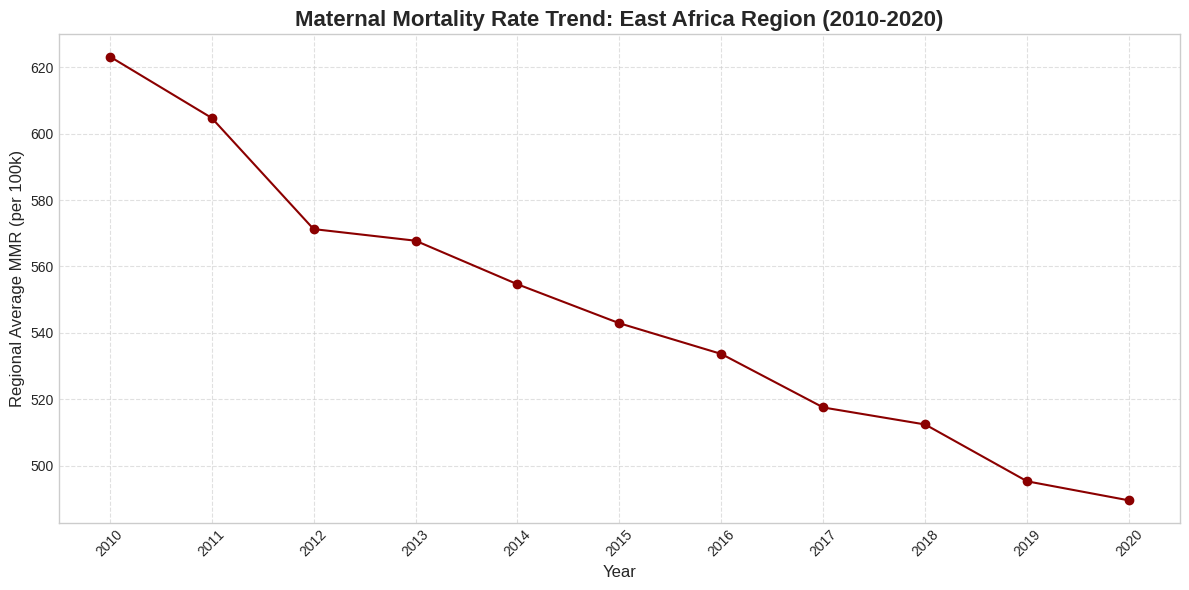

In [17]:
import matplotlib.pyplot as plt

# --- 1. Set up the Plot ---
plt.figure(figsize=(12, 6)) # Set size for better viewing
plt.style.use('seaborn-v0_8-whitegrid') # Use a clean, professional style

# --- 2. Create the Line Chart ---
plt.plot(
    df_trend['year'],
    df_trend['Regional_Avg_Maternal_Mortality'],
    marker='o',
    linestyle='-',
    color='darkred'
)

# --- 3. Add Labels and Titles (Crucial for Reporting) ---
plt.title(
    'Maternal Mortality Rate Trend: East Africa Region (2010-2020)',
    fontsize=16,
    fontweight='bold'
)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Regional Average MMR (per 100k)', fontsize=12)
plt.xticks(df_trend['year'].astype(int), rotation=45) # Show every year cleanly

# --- 4. Final Touches and Display ---
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [18]:
# Group the clean data by 'country' and calculate the mean (average) maternal mortality rate
df_country_avg = df_clean.groupby('country')['maternal_mortality'].mean().sort_values(ascending=False)

print("--- Country Benchmarking: Avg Maternal Mortality (2010-2020) ---")
print("Rate is sorted high-to-low (Highest rate needs most intervention)")
print(df_country_avg)

--- Country Benchmarking: Avg Maternal Mortality (2010-2020) ---
Rate is sorted high-to-low (Highest rate needs most intervention)
country
South Sudan    1181.818182
Somalia         765.454545
Burundi         531.000000
Kenya           497.454545
Ethiopia        427.454545
Tanzania        340.454545
Uganda          319.090909
Rwanda          310.181818
Name: maternal_mortality, dtype: float64


In [19]:
# Create a new mapping DataFrame from the clean data (df_clean)
df_map = df_clean.groupby(['country', 'country_code'])['maternal_mortality'].mean().reset_index()

# Rename the column for clarity and map-plotting
df_map.rename(columns={'maternal_mortality': 'Avg_MMR'}, inplace=True)

print("--- Data Ready for Mapping ---")
print(df_map)

--- Data Ready for Mapping ---
       country country_code      Avg_MMR
0      Burundi          BDI   531.000000
1     Ethiopia          ETH   427.454545
2        Kenya          KEN   497.454545
3       Rwanda          RWA   310.181818
4      Somalia          SOM   765.454545
5  South Sudan          SSD  1181.818182
6     Tanzania          TZA   340.454545
7       Uganda          UGA   319.090909


In [20]:
!pip install plotly # Install plotly library if it is not already installed

import plotly.express as px

# Create the Choropleth Map
fig = px.choropleth(
    df_map,
    locations='country_code', # Column containing the country codes (e.g., KEN, SSD)
    color='Avg_MMR',          # Column determining the color intensity (MMR value)
    hover_name='country',     # What shows up when you hover over the country
    color_continuous_scale=px.colors.sequential.Reds, # Use a scale that highlights high mortality (dark red)
    scope='africa',           # Focus the map on the African continent
    title='Average Maternal Mortality Rate (MMR): East Africa (2010-2020)'
)

# Customize the layout for better presentation
fig.update_layout(
    margin={"r":0,"t":50,"l":0,"b":0},
    height=600,
    coloraxis_colorbar=dict(
        title="Avg. MMR (per 100k)",
        thicknessmode="pixels", thickness=20,
        lenmode="pixels", len=300,
        yanchor="top", y=1,
        ticks="outside",
        dtick=200,
    )
)

fig.show()

In [22]:
import plotly.express as px

# Create an interactive horizontal bar chart, sorted by MMR value
fig_bar = px.bar(
    df_map.sort_values(by='Avg_MMR', ascending=True), # Sort low-to-high for clean visualization
    y='country',                                     # Countries on the y-axis
    x='Avg_MMR',                                     # MMR values on the x-axis
    color='Avg_MMR',                                 # Color bars based on the rate
    orientation='h',                                 # Make it horizontal
    color_continuous_scale=px.colors.sequential.Reds, # Reverse the Red scale so high MMR is dark red
    title='Average Maternal Mortality Rate by Country (2010-2020)',
    labels={'Avg_MMR': 'Avg. MMR (per 100k)', 'country': 'Country'}
)

fig_bar.update_layout(height=500, showlegend=False)
fig_bar.show()

In [23]:
# We drop rows where EITHER of the variables is missing.
df_corr = df_africa.dropna(subset=['health_exp', 'under_5_mortality']).copy()

# Calculate the number of rows dropped
rows_dropped_corr = df_africa.shape[0] - df_corr.shape[0]

print(f"Total rows dropped for correlation analysis: {rows_dropped_corr}")
print(f"Final clean rows for correlation analysis: {df_corr.shape[0]}")

Total rows dropped for correlation analysis: 35
Final clean rows for correlation analysis: 77


In [24]:
# --- 1. Calculate Correlation Coefficient (r) ---
correlation_r = df_corr['health_exp'].corr(df_corr['under_5_mortality'])

# --- 2. Create Scatter Plot ---
fig_scatter = px.scatter(
    df_corr,
    x='health_exp',
    y='under_5_mortality',
    color='country',              # Color points by country for better insight
    title=f'Health Expenditure vs. Under-5 Mortality (r={correlation_r:.2f})', # Include the r value in the title
    labels={
        'health_exp': 'Health Expenditure (% of GDP)',
        'under_5_mortality': 'Under-5 Mortality Rate (per 1k births)'
    },
    trendline='ols' # Add an Ordinary Least Squares trend line for visual confirmation
)

print(f"--- CORRELATION RESULT ---")
print(f"Pearson Correlation (r) between Health Expenditure and Under-5 Mortality: {correlation_r:.4f}")

fig_scatter.show()

--- CORRELATION RESULT ---
Pearson Correlation (r) between Health Expenditure and Under-5 Mortality: 0.5586


/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning:

divide by zero encountered in scalar divide



In [25]:
# Aggregate the clean correlation data (df_corr) by country to get the average
df_corr_avg = df_corr.groupby('country')[['health_exp', 'under_5_mortality']].mean().reset_index()

# Create a much cleaner Scatter Plot using the aggregated data
fig_clean_scatter = px.scatter(
    df_corr_avg,
    x='health_exp',
    y='under_5_mortality',
    text='country', # Use the country name as the text label for clarity
    title='Avg. Health Expenditure vs. Avg. Under-5 Mortality (Smoothed Data)',
    labels={
        'health_exp': 'Avg. Health Expenditure (% of GDP)',
        'under_5_mortality': 'Avg. Under-5 Mortality Rate (per 1k births)'
    }
)

# Add a smooth line of best fit (trendline) to the aggregated data
fig_clean_scatter.update_traces(textposition='top center')
fig_clean_scatter.update_layout(height=600)

fig_clean_scatter.show()

In [26]:
# Calculate the overall mean Under-5 Mortality Rate for the East Africa region
regional_avg_u5mr = df_corr['under_5_mortality'].mean()

print(f"Regional Average Under-5 Mortality Rate (2010-2020): {regional_avg_u5mr:.2f}")

Regional Average Under-5 Mortality Rate (2010-2020): 58.93


In [27]:
# Filter the clean data for Kenya
df_kenya = df_corr[df_corr['country'] == 'Kenya'].copy()

# Find the latest year and the U5MR for that year
latest_year = df_kenya['year'].max()
kenya_latest_u5mr = df_kenya[df_kenya['year'] == latest_year]['under_5_mortality'].iloc[0]

print(f"Kenya's U5MR in the latest available year ({latest_year}): {kenya_latest_u5mr:.2f}")

# Calculate the difference for the policy insight
difference = kenya_latest_u5mr - regional_avg_u5mr

print(f"\n--- POLICY INSIGHT ---")
if difference < 0:
    print(f"Kenya is {abs(difference):.2f} units BELOW the regional average.")
else:
    print(f"Kenya is {abs(difference):.2f} units ABOVE the regional average.")

Kenya's U5MR in the latest available year (2021): 41.90

--- POLICY INSIGHT ---
Kenya is 17.03 units BELOW the regional average.
